<a href="https://colab.research.google.com/github/bdbejarc/Instrumentos-Opticos/blob/main/4c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt  

In [ ]:
def ploteo_complejo(mat, indicador, escala):
  if(indicador == "I"):
    mat = np.abs(mat)**2
  elif(indicador == "A"):
    mat = abs(mat)
  elif (indicador == "P"):
    mat = np.angle(mat)

  if (escala == 1):
    plt.figure()
    plt.imshow(mat)
    plt.colorbar()
    plt.show()

  else:
    plt.figure()
    plt.imshow(np.log(mat+0.0000001))
    plt.colorbar()
    plt.show()

  return 0

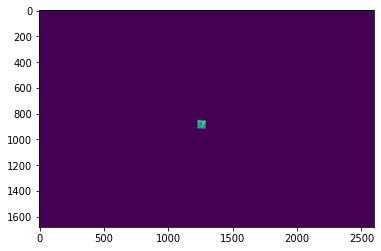

(1680, 2600)

In [156]:
img = cv2.imread('c_clue.jpg',0)
fft_img_prev = np.fft.fftn(img)
out = np.zeros(fft_img_prev.shape, np.double)
fft_img = np.fft.fftshift(fft_img_prev) #(cv2.normalize(fft_img_prev, out, 1.0, 0.0, cv2.NORM_MINMAX))

plt.figure()
plt.imshow(img)
plt.show()

np.shape(img)

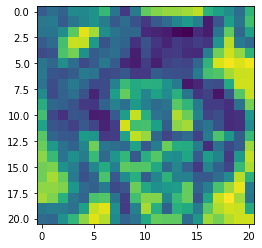

(21, 21)


In [ ]:
kernel = img[19:40,19:40]/441
plt.figure()
plt.imshow(kernel)
plt.show()

w = np.shape(kernel)
print(w)

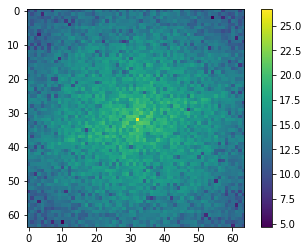

0

In [ ]:
ploteo_complejo(fft_img, "I", 0)

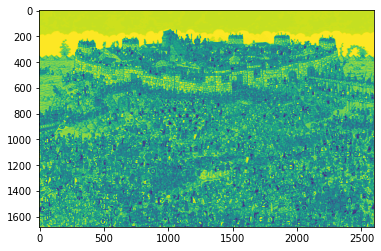

(1680, 2600)

In [157]:
img2 = cv2.imread('c.jpeg',0)
fft_img_prev2 = np.fft.fftn(img2)
fft_img2 = np.fft.fftshift(fft_img_prev2) #(cv2.normalize(fft_img_prev2, out, 1.0, 0.0, cv2.NORM_MINMAX)))

plt.figure()
plt.imshow(img2)
plt.show()

np.shape(img2)


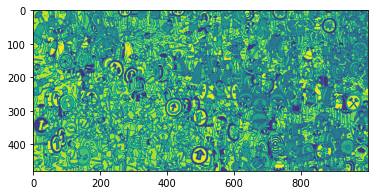

(480, 1000)


In [ ]:
img3 = img2[1200:1680,0:1000]
plt.figure()
plt.imshow(img3)
plt.show()

w2 = np.shape(img3)
print(w2)

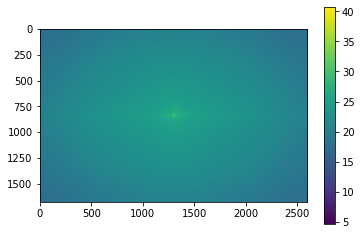

0

In [ ]:
ploteo_complejo(fft_img2, "I", 0)

In [ ]:
res = np.zeros(np.shape(img2))

for x in list (range(1, w2[0]-10)):
  for y in list (range(1, w2[1]-10)):

    suma = 0 

    for i in list (range(-1, 20)):

      for j in list (range(-1, 20)):

        conv = suma + img2[x-i, y-j] * kernel[i+1,j+1]
    res[x,y] = conv
#print(res)

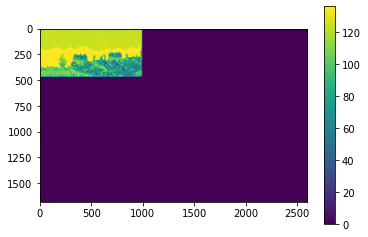

In [ ]:
res = res.astype(np.uint8)

plt.figure()
plt.imshow(res)
plt.colorbar()
plt.show()

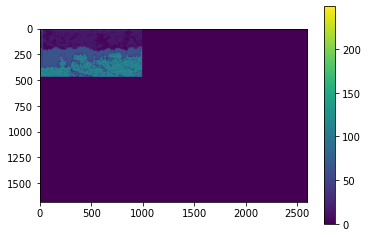

0

In [ ]:
ploteo_complejo(res, "I", 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


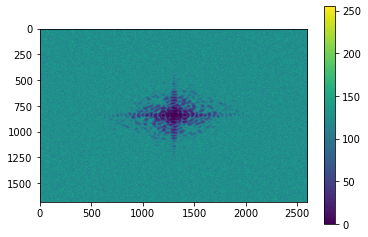

In [165]:
convolucion = fft_img * np.conj(fft_img2)

plt.figure()
plt.imshow(np.uint8(convolucion))
plt.colorbar()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


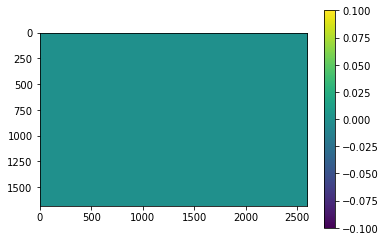

In [162]:
resultado = np.fft.fftn(convolucion)

plt.figure()
plt.imshow(np.uint8(resultado))
plt.colorbar()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


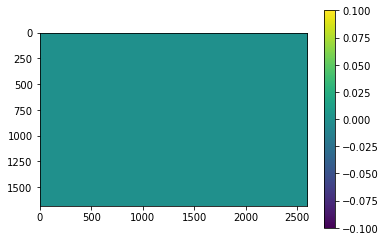

0

In [160]:
ploteo_complejo(np.uint8(resultado), "intensidad", 1)